# Applying convolution to raster
In this notebook we show how to use a kernle to blur a raster and write the result. Read more about image processing with kernels here:
https://en.wikipedia.org/wiki/Kernel_(image_processing)

1. open the raster with `rasterio` and transform to np.array
2. define and apply kernel using convolve in `ndimage` library
3. write the tif file to disk using rasterio

## READING AND PROCESSING RASTER

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# library that has convolution function
from scipy import ndimage

# to work with rasters
# https://rasterio.readthedocs.io/en/latest/quickstart.html#opening-a-dataset-in-reading-mode
import rasterio
from rasterio.plot import show

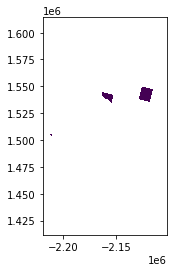

<AxesSubplot:>

In [3]:
# open and plot raster 

rast = rasterio.open('sb_moist_2_dry.tif')
rasterio.plot.show(rast)

# this is pointing at the open file, not actually the file

In [4]:
#actually read the band and transfrom to np array
img = np.array(rast.read(1))  
print(img)

[[-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 ...
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]]


In [5]:
# change values of raster cells to be 0 and 1
img2 = np.where( img<0, 0, img)
img2 = np.where( img2>0, 1, img2)
print(img2)
# help(np.where)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


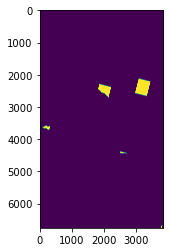

In [6]:
plt.imshow(img2)

## IMAGE CONVOLUTION

Reference to `scipy.ndimage.convolve`, in particular check the different ways you can deal with convolving the cells at the boundary. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html

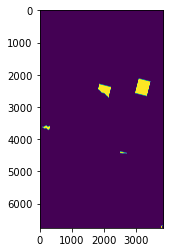

In [8]:
# define kernel
k = np.array([[1,1,1],
              [1,1,1],
              [1,1,1]])/9

k_image = ndimage.convolve(img2, k, mode='constant', cval=0.0)
plt.imshow(k_image)

In [11]:
print('img2:', np.unique(img2))
print('k_image', np.unique(k_image))

img2: [0. 1.]
k_image [0.         0.11111111 0.22222222 0.33333334 0.44444445 0.5555556
 0.6666667  0.7777778  0.8888889  1.        ]


## SHORTCUT

test [-3.4000000e+38 -3.0222222e+38 -2.6444445e+38 -2.2666666e+38
 -1.8888888e+38 -1.5111111e+38 -1.1333333e+38 -7.5555556e+37
 -3.7777778e+37  6.0000000e+00]


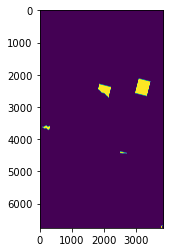

In [13]:
# you could also input the raster band directly, no need to convert to array
# however, we did some pre-processing to get rid of those really negative values
test = ndimage.convolve(rast.read(1), k, mode='constant', cval=0.0)
plt.imshow(k_image)
print('test', np.unique(test))

## EXPORT RASTER

In [14]:
## EXPORT RASTER: np arary -> raster
# https://rasterio.readthedocs.io/en/latest/quickstart.html#saving-raster-data

new_dataset = rasterio.open(
    './new.tif',    # file to be created
    'w',               # write mode
    driver='GTiff',    # name of the desired format driver
    height=k_image.shape[0], # number of columns in dataset
    width=k_image.shape[1],  # number of rows in dataset
    count=1,           # count of dataset bands
    dtype=k_image.dtype,     # data type of staset
    crs= rast.crs,  # CRS identifier or description
    transform=rast.transform,  # affine transformation matrix
)

# copy the grid to the opened dataset, call the new dataset’s write() method 
# with the grid and target band number as arguments.
new_dataset.write(k_image, 1)

# call the close() method to sync data to disk and finish.
new_dataset.close()

Other references:

https://stackoverflow.com/questions/6094957/high-pass-filter-for-image-processing-in-python-by-using-scipy-numpy

https://gis.stackexchange.com/questions/373648/seeking-arcgis-focal-statistics-alternative-in-open-source-python

https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/convolution-function.htm


In [ ]:
# another way: open raster as image
# https://stackoverflow.com/questions/51152059/pillow-in-python-wont-let-me-open-image-exceeds-limit
#from PIL import Image


#Image.MAX_IMAGE_PIXELS = None
#im = Image.open('sb_moist_2_dry.tif')

#im.show()